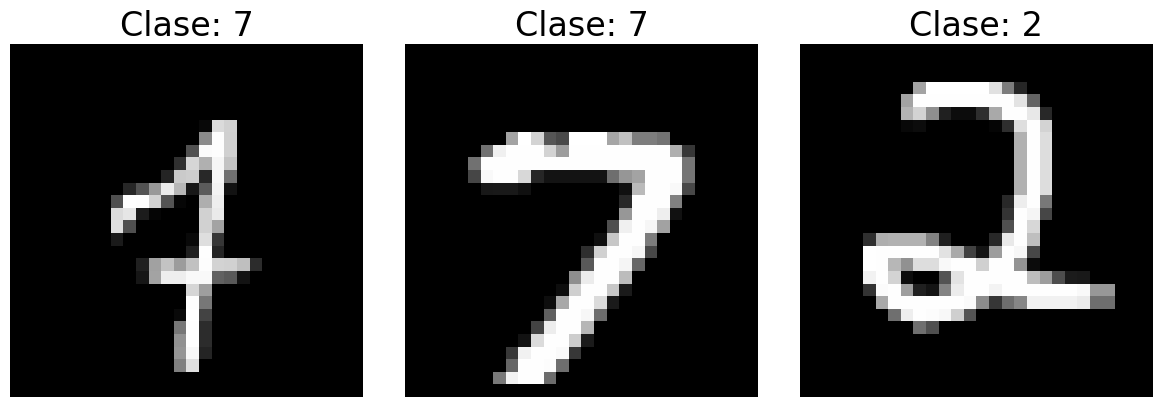

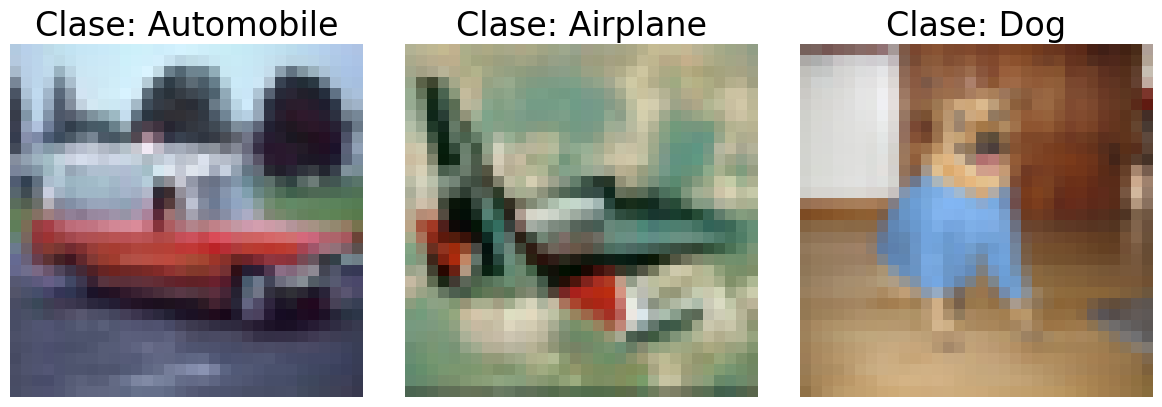

In [ ]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np

def plot_dataset_samples(dataset_name, root_dir='../data', num_samples=3):
    """
    Carga un dataset (MNIST o CIFAR10) y grafica muestras aleatorias horizontalmente.
    """
    
    # Configuración para cargar los datasets
    # Asumimos que los datos ya están descargados en root_dir
    if dataset_name.upper() == 'MNIST':
        try:
            dataset = torchvision.datasets.MNIST(root=root_dir, train=True, download=False)
            classes = [str(i) for i in range(10)]
            cmap = 'gray'
        except RuntimeError:
            print("No se encontró MNIST en la ruta especificada.")
            return
            
    elif dataset_name.upper() == 'CIFAR10':
        try:
            dataset = torchvision.datasets.CIFAR10(root=root_dir, train=True, download=False)
            classes = dataset.classes
            cmap = None
        except RuntimeError:
            print("No se encontró CIFAR10 en la ruta especificada.")
            return
    else:
        print(f"Dataset {dataset_name} no reconocido.")
        return

    # Seleccionar índices aleatorios
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    
    # Crear figura
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))    
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        ax = axes[i]
        
        ax.imshow(image, cmap=cmap)
        ax.set_title(f"Clase: {classes[label].capitalize()}", fontsize=24)
        ax.axis('off')
        
    plt.tight_layout()
    plt.savefig(f"../documento/figures/{dataset_name}_samples.pdf", bbox_inches='tight')

# Ejecutar la función para ambos datasets
plot_dataset_samples('MNIST')
plot_dataset_samples('CIFAR10')